In [7]:
import warnings
warnings.filterwarnings('ignore')
from cherenkov_toy import Particle, Medium, CherenkovPerParticle, CherenkovMontecarlo, c
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using ensembles of particles

For inst

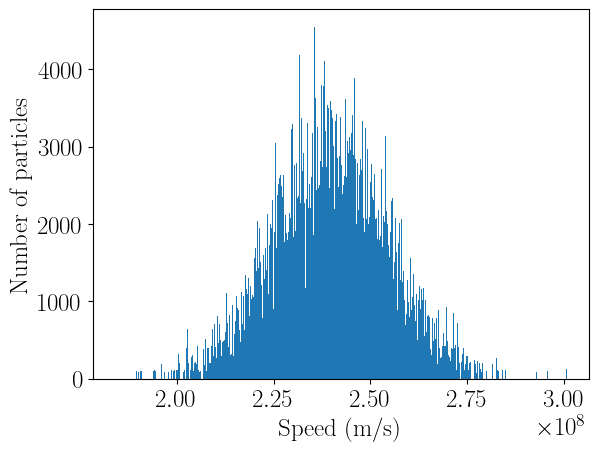

In [8]:
medium = Medium(1.33, 0.1)
speed_distribution = np.random.normal(loc=0.8*c, scale=0.05*c, size=10000)
cherenkov_mc = CherenkovMontecarlo(medium, speed_distribution)
cherenkov_mc.plot_speed_distribution()

Now, note how simple for us it is to use the ensemble of particles to compute the mean and variance of the distribution, in this case for example... the Cherenkov's angle

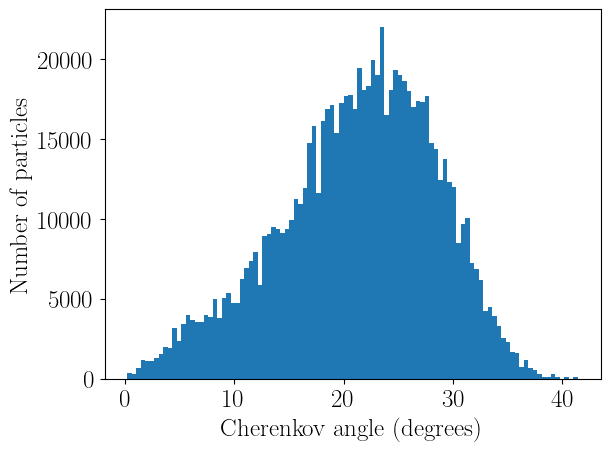

In [9]:
cherenkov_mc.plot_angles_distribution(omega = 2*np.pi*1e14, n_bins=100, degrees=True)

And we can explore for example the how the mean and variance of the distribution change as we increase the angular frequency of the particle.

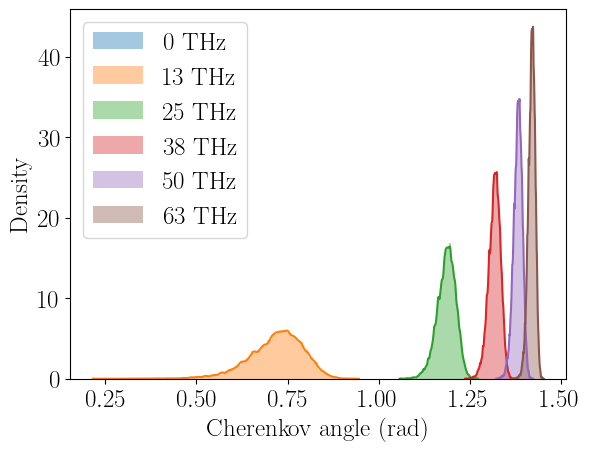

In [21]:
fig, ax = plt.subplots()
strange_medium = Medium(lambda omega: omega *1.33 /1e15, 0.1)
cherenkov_mc = CherenkovMontecarlo(strange_medium, speed_distribution)
for omega in np.linspace(2*np.pi*1e8, 2*np.pi*1e15, 6):
    angles = cherenkov_mc.get_angles_distribution(omega)
    sns.distplot(angles, ax=ax, label=f'{omega/1e14:.0f} THz',)
ax.set_xlabel('Cherenkov angle (rad)')
fig.show()
ax.legend()

And lets do a similar thing for the energy of the particle. This is the integrated energy per differential length in the material. If you need as refresh about this, go to the notebook on the theory of Cherenkov radiation.

In [24]:
energies_dx = cherenkov_mc.get_energy_per_length(min_omega=2*np.pi*1e8, max_omega=2*np.pi*1e15)